<a href="https://colab.research.google.com/github/JuanSeBestia/ML-Wine-regression/blob/master/ML_wine_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-wine-regresion

Laboratory maked in S4N Academy in course the mathematics applied in Machine Learning (ML)

For this laboratory we will use the linear regression to make a model that can predict the quality of the wine according to the characteristics observed in the experiments carried out by wine tasters.

For more information about the applied regressión you can consult class 6

## Download database
The database is hosted on a github repo on "WineQualityRed.csv" and "WineQualityRed.csv"

This database has the samples of some experiments on the quality of the wine, contrasted with the result of some tasters

In [10]:
!rm -rf ML-Wine-regression
!git clone  https://github.com/JuanSeBestia/ML-Wine-regression.git

print("WineQualityRed")
!head ML-Wine-regression/WineQualityRed.csv
print("WineQualityWhite")
!head ML-Wine-regression/WineQualityWhite.csv

Cloning into 'ML-Wine-regression'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 1), reused 11 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.
WineQualityRed
,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
7,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
WineQualityWhite
,fixed acidity,volatile acidit

## Import and Load Database

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



np.set_printoptions(precision=4, suppress=True)

dataWineRed = pd.read_csv("ML-Wine-regression/WineQualityRed.csv", sep=",").iloc[:, 1:]
dataWineWhite = pd.read_csv("ML-Wine-regression/WineQualityWhite.csv", sep=",").iloc[:, 1:]

for i in dataWineRed.keys():
    print("\t", "{:.4f}".format(dataWineRed[i].min()),
          "\t", "{:.4f}".format(dataWineRed[i].mean()),
          "\t", "{:.4f}".format(dataWineRed[i].max()), "\t", i)

print()

for i in dataWineWhite.keys():
    print("\t", "{:.4f}".format(dataWineWhite[i].min()),
          "\t", "{:.4f}".format(dataWineWhite[i].mean()),
          "\t", "{:.4f}".format(dataWineWhite[i].max()), "\t", i)

print()

	 4.6000 	 8.3196 	 15.9000 	 fixed acidity
	 0.1200 	 0.5278 	 1.5800 	 volatile acidity
	 0.0000 	 0.2710 	 1.0000 	 citric acid
	 0.9000 	 2.5388 	 15.5000 	 residual sugar
	 0.0120 	 0.0875 	 0.6110 	 chlorides
	 1.0000 	 15.8749 	 72.0000 	 free sulfur dioxide
	 6.0000 	 46.4678 	 289.0000 	 total sulfur dioxide
	 0.9901 	 0.9967 	 1.0037 	 density
	 2.7400 	 3.3111 	 4.0100 	 pH
	 0.3300 	 0.6581 	 2.0000 	 sulphates
	 8.4000 	 10.4230 	 14.9000 	 alcohol
	 3.0000 	 5.6360 	 8.0000 	 quality

	 3.8000 	 6.8548 	 14.2000 	 fixed acidity
	 0.0800 	 0.2782 	 1.1000 	 volatile acidity
	 0.0000 	 0.3342 	 1.6600 	 citric acid
	 0.6000 	 6.3914 	 65.8000 	 residual sugar
	 0.0090 	 0.0458 	 0.3460 	 chlorides
	 2.0000 	 35.3081 	 289.0000 	 free sulfur dioxide
	 9.0000 	 138.3607 	 440.0000 	 total sulfur dioxide
	 0.9871 	 0.9940 	 1.0390 	 density
	 2.7200 	 3.1883 	 3.8200 	 pH
	 0.2200 	 0.4898 	 1.0800 	 sulphates
	 8.0000 	 10.5143 	 14.2000 	 alcohol
	 3.0000 	 5.8779 	 9.0000 	

## Mix the samples

In [0]:
shuffleWineRed = dataWineRed.sample(frac=1)
shuffleWineWhite = dataWineWhite.sample(frac=1)

## Separate samples (training, tests)

In [9]:
numTrainRed = np.floor(0.8*len(shuffleWineRed.index)).astype(np.int)
numTrainWhite = np.floor(0.8*len(shuffleWineWhite.index)).astype(np.int)

trainWineRedX = shuffleWineRed.iloc[:numTrainRed, :-1]
trainWineRedY = shuffleWineRed.iloc[:numTrainRed, -1]
testWineRedX = shuffleWineRed.iloc[numTrainRed:, :-1]
testWineRedY = shuffleWineRed.iloc[numTrainRed:, -1]
trainWineWhiteX = shuffleWineWhite.iloc[:numTrainWhite, :-1]
trainWineWhiteY = shuffleWineWhite.iloc[:numTrainWhite, -1]
testWineWhiteX = shuffleWineWhite.iloc[numTrainWhite:, :-1]
testWineWhiteY = shuffleWineWhite.iloc[numTrainWhite:, -1]

print(trainWineRedX.shape)
print(trainWineRedY.shape)
print(testWineRedX.shape)
print(testWineRedY.shape)
print()

print(trainWineWhiteX.shape)
print(trainWineWhiteY.shape)
print(testWineWhiteX.shape)
print(testWineWhiteY.shape)
print()


(1279, 11)
(1279,)
(320, 11)
(320,)

(3918, 11)
(3918,)
(980, 11)
(980,)



## Found the coeficients for model

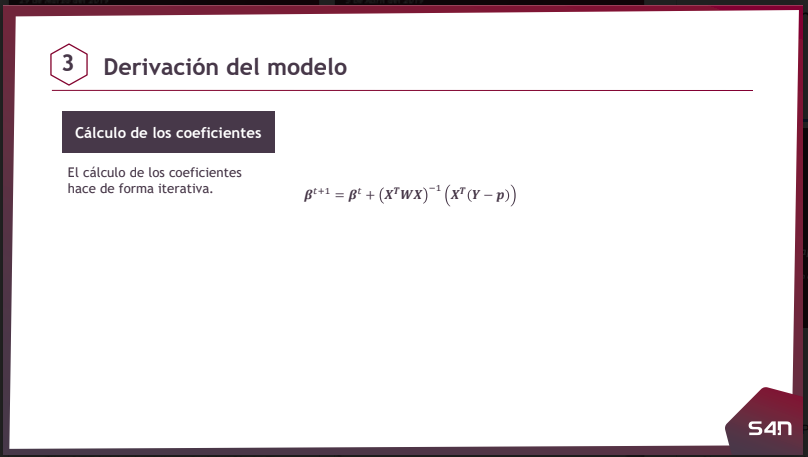

In [11]:
from IPython.display import Image
Image("ML-Wine-regression/CalculateCoeficcients.png")

In [12]:
print("WineRed")
matXRed = np.append(np.ones((numTrainRed, 1)), trainWineRedX.values, axis=1)
XporXRed = np.matmul(np.transpose(matXRed), matXRed)
invXporXRed = np.linalg.inv(XporXRed)
XporYRed = np.matmul(np.transpose(matXRed), trainWineRedY.values)
coefBetaRed = np.matmul(invXporXRed, XporYRed)
print(coefBetaRed)
print()


[ 36.2202   0.0272  -1.0509  -0.1141   0.0308  -1.7041   0.0046  -0.0036
 -32.5823  -0.3092   0.9871   0.2685]



In [13]:
print("WineWhite")
matXWhite = np.append(np.ones((numTrainWhite, 1)), trainWineWhiteX.values, axis=1)
XporXWhite = np.matmul(np.transpose(matXWhite), matXWhite)
invXporXWhite = np.linalg.inv(XporXWhite)
XporYWhite = np.matmul(np.transpose(matXWhite), trainWineWhiteY.values)
coefBetaWhite = np.matmul(invXporXWhite, XporYWhite)
print(coefBetaWhite)
print()

WineWhite
[ 133.5215    0.0714   -1.7878   -0.0525    0.0754   -0.4966    0.005
   -0.0002 -133.6397    0.6334    0.6097    0.2195]



You can use LinearRegression from the sklearn library, to do the same

In [15]:
linRegRed = LinearRegression()
linRegRed.fit(trainWineRedX, trainWineRedY)
predictWineRed = linRegRed.predict(testWineRedX)
MSERed = mean_squared_error(testWineRedY, predictWineRed)
print("Linear regression results for the RED Wine")
print("Regression intercept:\t", linRegRed.intercept_)
print("Linear regression coefficients: ", linRegRed.coef_)
print("Mean square error:\t\t", "{:.4F}".format(MSERed))
print("Root mean square error:\t", "{:.4f}".format(np.sqrt(MSERed)))
print()

Linear regression results for the RED Wine
Regression intercept:	 36.2201654898935
Linear regression coefficients:  [  0.0272  -1.0509  -0.1141   0.0308  -1.7041   0.0046  -0.0036 -32.5823
  -0.3092   0.9871   0.2685]
Mean square error:		 0.4577
Root mean square error:	 0.6765



In [16]:
linRegWhite = LinearRegression()
linRegWhite.fit(trainWineWhiteX, trainWineWhiteY)
predictWineWhite = linRegWhite.predict(testWineWhiteX)
MSEWhite = mean_squared_error(testWineWhiteY, predictWineWhite)
print("Linear regression results for the WHITE Wine")
print("Regression intercept:\t", linRegWhite.intercept_)
print("Linear regression coefficients: ", linRegWhite.coef_)
print("Mean square error:\t\t", "{:.4F}".format(MSEWhite))
print("Root mean square error:\t", "{:.4f}".format(np.sqrt(MSEWhite)))
print()

Linear regression results for the WHITE Wine
Regression intercept:	 133.5214565611637
Linear regression coefficients:  [   0.0714   -1.7878   -0.0525    0.0754   -0.4966    0.005    -0.0002
 -133.6397    0.6334    0.6097    0.2195]
Mean square error:		 0.5880
Root mean square error:	 0.7668

